In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Start our experiments using the 20k dataset with number replaced by '@' sign
data_dir = r"C:\Users\jagam\Desktop\PubMed\pubmed-rct-master\PubMed_20k_RCT_numbers_replaced_with_at_sign\\"


In [3]:
# Check all the filename in target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['C:\\Users\\jagam\\Desktop\\PubMed\\pubmed-rct-master\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\\\dev.txt',
 'C:\\Users\\jagam\\Desktop\\PubMed\\pubmed-rct-master\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\\\test.txt',
 'C:\\Users\\jagam\\Desktop\\PubMed\\pubmed-rct-master\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\\\train.txt']

In [4]:
# Create a function to read the lines of the document
def get_lines(filename):
    '''
    Function that takes the file location as input and returns a list containing the contentes of the file
    '''
    with open(filename, 'r') as f:
        return f.readlines()  # Return a list

In [5]:

train_lines = get_lines(os.path.join(data_dir, 'train.txt'))

# Display the first 20 lines of the training data
train_lines[:27]


['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

**Converting the data into desired format --> list of dictionaries [{'line_number': pos of a txt, 'target': label of txt, 'text': 'Actual txt', 'total_lines': lines in the abstract of that id}]**

* write a function to convert our dataset into the desired format

In [6]:
def preprocess_text_with_line_numbers(filename):
    '''
    Returns a list of dict of abstract line data

    i/p: filename, reads the content and sorts through each line,
    o/p: extracting target labels, text of the sentence, no of sentence in the abstract, target line number
    '''
    input_lines = get_lines(filename) # get all the lines present in the file
    abstract_lines = "" # Create an empty abstract
    abstract_samples = [] # Create an empty list of abstracts

    # Loop through each lne in the taret file
    for line in input_lines:
        if line.startswith('###'): # If it is the line is the ID line
            abstract_id = line
            abstract_lines = "" # it means that 1 abstract has ended so reset it to hv txt frm next abstract
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines() # return lst each sentence one element 

            # Iterate through each line in a single abstract and count them at the same time
            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                line_data = {} # Create an empty dict for each line
                target_text_split = abstract_line.split('\t') # spilt target label from text
                line_data['target'] = target_text_split[0] # get target label
                line_data['text'] = target_text_split[1].lower() # get target text and lower it
                line_data['line_number'] = abstract_line_number # what number does the line appear at
                line_data['total_lines'] = len(abstract_line_split) - 1
                # total lines in the target abstract (-1 becoz id of the abstract will be one element in list)
                abstract_samples.append(line_data) # add line data to abstract samples list

        else:
            abstract_lines += line
    return abstract_samples

In [7]:
# Get data from file and preprocess it
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)
     

(180040, 30212, 30135)

In [8]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

### Converting our dictionary into dataFrame

In [9]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [10]:
# Distribution of labels in training data
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

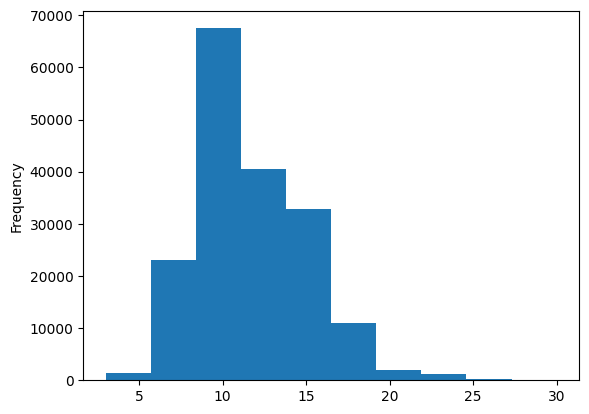

In [11]:
train_df['total_lines'].plot(kind='hist')

In [12]:
# Convert abstract tex lins into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences),len(test_sentences)

(180040, 30212, 30135, 30135)

**Numerically encoding the labels**

In [13]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

In [14]:
# Extract labels ('target' columns) and encode them into integers
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

In [15]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [16]:
# Get class names and number of classes from LabelEncoder instance 
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names
     

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# Creating Models

## Model 0: Getting a baseline (TF-IDF Multinomial Naive Bayes classifier)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [18]:
# Create a Pipeline
model_0 = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('clf',MultinomialNB())
])
# Fit the pipeline to training data
model_0.fit(X=train_sentences,y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [19]:
# Evaluate baseline model on validation dataset
model_0.score(X = val_sentences,
             y = val_labels_encoded)

0.7218323844829869

In [20]:
# Make predictions using our baseline model
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [21]:
val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

In [22]:
from helper_functions import calculate_results

In [23]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [24]:
# Preparing our data for the deep sequence model
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [25]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

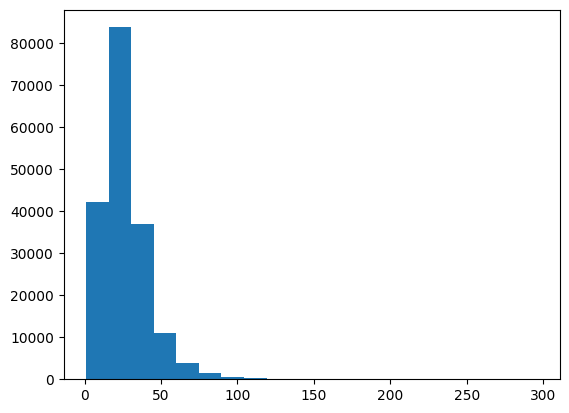

In [26]:
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20);

In [27]:
output_seq_len = int(np.percentile(sent_lens,95))
output_seq_len

55

It means 95% of the sentences has length of word within 55 

In [28]:
max(sent_lens)

296

### Create text vectorizer layer
We want to make a layer which maps our text from words to numbers

In [29]:
max_tokens = 68000

In [30]:
# Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_tokens, # no of words in vocabulay
                                   output_sequence_length=output_seq_len) # desired output length of vectorized sequence

In [31]:
# Adapt text vectorizer to training sentence
text_vectorizer.adapt(train_sentences)

In [32]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
stroke is one of the most common causes of cognitive impairment .

Length of text: 12

Vectorized text:
[[ 276   20   88    4    2  215  317 1726    4  301  798    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [33]:
# How many words in our training vacabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f'Number of words in vocab: {len(rct_20k_text_vocab)}')
print(f'Most common words in the vocab: {rct_20k_text_vocab[:5]}')
print(f"Least common words in the vocab: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [34]:
# Get the config of our text vect
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Create custom text embedding

In [35]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),# length of vocab,
                              output_dim=128,# Diff embedding size will result in diff parameters that model train from
                              mask_zero =True,# Use making to handel variable sequence length (save space)
                              name = 'token_embedding')

In [36]:
print(f'Sentence before vectorization:\n{target_sentence}\n')
vectorized_sentences = text_vectorizer([target_sentence])
print(f'Sentences after vectorization (before embedding):\n {vectorized_sentences}\n')
embedded_sentence = token_embed(vectorized_sentences)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
stroke is one of the most common causes of cognitive impairment .

Sentences after vectorization (before embedding):
 [[ 276   20   88    4    2  215  317 1726    4  301  798    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Sentence after embedding:
 [[[ 0.02913369 -0.01055495  0.00659859 ... -0.01267391 -0.00523426
    0.04044617]
  [ 0.04527066 -0.01039926  0.00176756 ...  0.0200626   0.03438184
    0.00471771]
  [ 0.04359342 -0.03401311  0.0003106  ...  0.02957891 -0.03811004
   -0.01256709]
  ...
  [ 0.04735554  0.01250775  0.00816926 ...  0.02311977 -0.02051692
    0.00538783]
  [ 0.04735554  0.01250775  0.00816926 ...  0.02311977 -0.02051692
    0.00538783]
  [ 0.04735554  0.01250775  0.00816926 ...  0.02311977 -0.02051692
    0.00538783]]]

Embedded sentence shape: (1, 55

## Creating Dataset (makingsure our data loads as fast as possible)

In [37]:
# Turn our data into Tensorflow Datasets
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

# look for cnn notes after model_3


In [38]:
train_labels_one_hot.shape, train_labels_one_hot[00]

((180040, 5), array([0., 0., 0., 1., 0.]))

In [39]:
# Take the TensorSliceDataset's and turn them into prefetched dataset
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Model 1: Conv1D with token embeddings 

In [40]:
# Create 1D conv models to process sequences
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [41]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [42]:
len(train_dataset)

5627

In [43]:
5627*32

180064

**len of train_dataset is 5627 ie 5627 batches are there each batch 32 samples so total samples = 180064**

In [44]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/3

562/562 [==============================] - 26s 44ms/step - loss: 0.9177 - accuracy: 0.6382 - val_loss: 0.6932 - val_accuracy: 0.7410
Epoch 2/3
562/562 [==============================] - 24s 43ms/step - loss: 0.6614 - accuracy: 0.7557 - val_loss: 0.6362 - val_accuracy: 0.7713
Epoch 3/3
562/562 [==============================] - 24s 44ms/step - loss: 0.6185 - accuracy: 0.7730 - val_loss: 0.5971 - val_accuracy: 0.7879


In [45]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5987 - accuracy: 0.7856


[0.5987193584442139, 0.7856481075286865]

In [46]:
# make predictions (our model predicts prediction probabilities for each classes)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs, model_1_pred_probs.shape

945/945 [==============================] - 3s 4ms/step


(array([[4.1376504e-01, 2.0510539e-01, 7.2999693e-02, 2.7311081e-01,
         3.5019044e-02],
        [4.0798542e-01, 3.1224644e-01, 1.1952949e-02, 2.5888026e-01,
         8.9348601e-03],
        [1.4364055e-01, 6.8301945e-03, 2.7354446e-03, 8.4675628e-01,
         3.7529669e-05],
        ...,
        [6.1311225e-06, 7.6569122e-04, 9.3247957e-04, 3.4252514e-06,
         9.9829215e-01],
        [4.7692280e-02, 4.7399661e-01, 8.8652395e-02, 6.1487194e-02,
         3.2817158e-01],
        [1.9060270e-01, 6.7114550e-01, 4.0844195e-02, 5.6170497e-02,
         4.1237090e-02]], dtype=float32),
 (30212, 5))

In [47]:
# Convert the pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1], dtype=int64)>

In [48]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                  y_pred = model_1_preds)
model_1_results

{'accuracy': 78.56480868529061,
 'precision': 0.7830998450914325,
 'recall': 0.7856480868529061,
 'f1': 0.783175272404438}

## Model 2: Feature extraction
The paper was realeased in 2016 and used Glove embedding but we will stick to USE pretrained embeddings

In [49]:
#Due to having to download a relatively large model (~916MB), the cell below may take a little while to run.
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")
     

In [50]:
# Test our pretrained embedding on a random sentence
random_train_sentence = random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence}\n")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")

Random sentence:
 it has the potential to capitalise on the benefits of bedsharing to enhance infant wellbeing while also safeguarding them from harm .
Sentence after embedding:
[[ 3.42593975e-02 -5.51087409e-02 -3.71178016e-02 -6.47219941e-02
  -7.58041590e-02  6.16514497e-02 -1.03035122e-02 -7.75112305e-03
  -3.42790373e-02 -3.29352655e-02  2.63002329e-02  4.00407575e-02
  -5.47983572e-02  5.16964532e-02  4.04347554e-02  1.10379960e-02
  -1.01433501e-01 -7.10717738e-02 -3.70598808e-02  3.90551426e-02
   1.06999101e-02  2.49858461e-02  7.26607591e-02  5.77638373e-02
   3.29228980e-03  4.00341563e-02 -2.88002715e-02  6.39342368e-02
   3.44296219e-03  3.60973217e-02 -4.58404794e-02  9.61862430e-02
   4.55786772e-02 -5.22266608e-03 -2.40211748e-02 -7.75492266e-02
   7.48423219e-04 -3.62938568e-02 -5.63724563e-02 -7.67241567e-02
   5.76595664e-02 -1.40574202e-02 -3.70360352e-02  2.86954474e-02
  -6.36961125e-03 -2.85089500e-02  6.96456656e-02 -3.77069674e-02
  -3.15286890e-02  2.20021680e

The Pretrained embedding USE returns a 512 D vector

### Building and fitting an NLP feature extraction model using pretrained embeddings

In [51]:
# Define feature extraction model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding of each sequence (512 long vector)
x = layers.Dense(128,activation='relu')(pretrained_embedding)
outputs = layers.Dense(5, activation='softmax')(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs,
                        name='model_2_USE_feature_extractor')
# Compile the model
model_2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [52]:
model_2.summary()

Model: "model_2_USE_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [53]:
# Fit model_2 to the data
history_model_2 = model_2.fit(train_dataset,
                             epochs=3,
                             steps_per_epoch=int(0.1 * len(train_dataset)),
                             validation_data=valid_dataset,
                             validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 10s 13ms/step - loss: 0.9156 - accuracy: 0.6490 - val_loss: 0.7976 - val_accuracy: 0.6908
Epoch 2/3
562/562 [==============================] - 7s 13ms/step - loss: 0.7693 - accuracy: 0.7017 - val_loss: 0.7566 - val_accuracy: 0.7051
Epoch 3/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7525 - accuracy: 0.7116 - val_loss: 0.7398 - val_accuracy: 0.7134


In [54]:
# Evaluate on the whole dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 10s 11ms/step - loss: 0.7406 - accuracy: 0.7137


[0.740583598613739, 0.7136568427085876]

In [55]:
# make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 10s 10ms/step


array([[4.1695049e-01, 3.7898844e-01, 2.7622154e-03, 1.9249237e-01,
        8.8064354e-03],
       [3.7048730e-01, 4.7007507e-01, 4.6756500e-03, 1.5124092e-01,
        3.5211109e-03],
       [2.0809311e-01, 1.5518411e-01, 1.9344753e-02, 5.7454473e-01,
        4.2833261e-02],
       ...,
       [1.4999417e-03, 4.9043265e-03, 5.3366724e-02, 9.0297189e-04,
        9.3932605e-01],
       [3.8075787e-03, 4.4834841e-02, 2.1317433e-01, 1.5026418e-03,
        7.3668057e-01],
       [1.5743439e-01, 2.7450958e-01, 4.8668361e-01, 5.9547322e-03,
        7.5417720e-02]], dtype=float32)

In [56]:
# Convert the prediction probabilities found with feature extraction models to labels
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2], dtype=int64)>

In [57]:
# Calculate results from TF Hub pretrained embedding results on val set
model_2_results = calculate_results(y_true=val_labels_encoded,
                                   y_pred= model_2_preds)
model_2_results

{'accuracy': 71.36568251026083,
 'precision': 0.7139777686062299,
 'recall': 0.7136568251026082,
 'f1': 0.7106154201257303}

### Model 3: Conv1D with character embedding

In the paper they used combination of token and character level embedding
Previously we've used token embeddings but we need to do similar steps for characters if we want to use char-level embeddings

#### Creating a character level embedding

In [58]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [59]:
# Make func to split sentence into characters
def split_chars(text):
    return " ".join(list(text))

In [60]:
split_chars(random_train_sentence)

'i t   h a s   t h e   p o t e n t i a l   t o   c a p i t a l i s e   o n   t h e   b e n e f i t s   o f   b e d s h a r i n g   t o   e n h a n c e   i n f a n t   w e l l b e i n g   w h i l e   a l s o   s a f e g u a r d i n g   t h e m   f r o m   h a r m   .'

In [61]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [62]:
# what is the average char length in each sentence
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)

In [63]:
mean_char_len

149.3662574983337

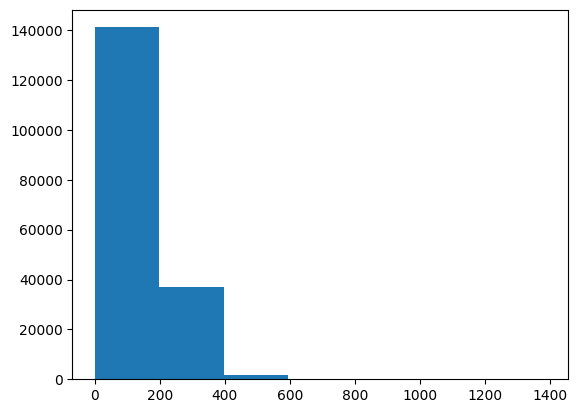

In [64]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [65]:
# Find what char len covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [66]:
# Get all the keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation

In [67]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for space and OOV (OOV = out of vocab, '[UNK]')

In [68]:
# Creating an instance of char-level Token Vectorizer instance
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                   output_sequence_length=output_seq_char_len,
                                   name='char_vectorizer')
                                   #standardize='lower_and_strip_punctuation')

In [69]:
# Adapt character vectorizer to training character
char_vectorizer.adapt(train_chars)

In [70]:
# Check character vocab stats
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in the character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5]}")

Number of different characters in the character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: k


In [71]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n {random_train_chars}")
print(f"Length of random_train_chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\Vectorized chars:\n {vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
 t h e   t o o t h - l e v e l   p r e v e n t i v e   f r a c t i o n s   w e r e   @   %   f o r   r e s i n - b a s e d   s e a l a n t s   a n d   @   %   f o r   g l a s s   i o n o m e r   s e a l a n t s   ,   r e s p e c t i v e l y   .
Length of random_train_chars: 103
\Vectorized chars:
 [[ 3 13  2  3  7  7  3 13 12  2 21  2 12 14  8  2 21  2  6  3  4 21  2 17
   8  5 11  3  4  7  6  9 20  2  8  2 17  7  8  8  2  9  4  6 22  5  9  2
  10  9  2  5 12  5  6  3  9  5  6 10 17  7  8 18 12  5  9  9  4  7  6  7
  15  2  8  9  2  5 12  5  6  3  9  8  2  9 14  2 11  3  4 21  2 12 19  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0

In [72]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=len(char_vocab),
                                 output_dim=25,
                                 mask_zero=True,
                                 name='char_embed')

In [73]:
# Check our character embedding layer
print(f"Charified text:\n {random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f'Embedded chars. (after vectorization and embedding):\n {char_embed_example}')
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text:
 t h e   t o o t h - l e v e l   p r e v e n t i v e   f r a c t i o n s   w e r e   @   %   f o r   r e s i n - b a s e d   s e a l a n t s   a n d   @   %   f o r   g l a s s   i o n o m e r   s e a l a n t s   ,   r e s p e c t i v e l y   .

Embedded chars. (after vectorization and embedding):
 [[[-0.02672203 -0.03833648  0.01773443 ...  0.01796975  0.00878048
    0.04154021]
  [-0.0143043  -0.03240974  0.01402949 ...  0.02736396  0.00275927
   -0.03543136]
  [ 0.01293211 -0.02236266 -0.01995236 ... -0.03936685  0.00763793
    0.02290546]
  ...
  [ 0.02972746  0.01380005  0.0364312  ...  0.03456831  0.04467264
   -0.00267931]
  [ 0.02972746  0.01380005  0.0364312  ...  0.03456831  0.04467264
   -0.00267931]
  [ 0.02972746  0.01380005  0.0364312  ...  0.03456831  0.04467264
   -0.00267931]]]
Character embedding shape: (1, 290, 25)


## Building a Conv1D to fit character embeddings

In [74]:
# Make conv1D on chars only
inputs = layers.Input(shape=(1,), dtype='string')
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(char_embeddings)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_3 = tf.keras.Model(inputs=inputs,
                        outputs=outputs,
                        name='model_3_conv1d_char_embeddings')
# Compile
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [75]:
model_3.summary()

Model: "model_3_conv1d_char_embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 

In [76]:
# Create char level dataset
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)


In [77]:
# Fitting our model on characters only
model_3_history = model_3.fit(train_char_dataset,
                             steps_per_epoch=int(0.1*len(train_char_dataset)),
                             epochs=3,
                             validation_data=val_char_dataset,
                             validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 8ms/step - loss: 1.2829 - accuracy: 0.4641 - val_loss: 1.0628 - val_accuracy: 0.5698
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 1.0239 - accuracy: 0.5889 - val_loss: 0.9541 - val_accuracy: 0.6193
Epoch 3/3
562/562 [==============================] - 7s 12ms/step - loss: 0.9349 - accuracy: 0.6325 - val_loss: 0.8772 - val_accuracy: 0.6562


In [78]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 4s 4ms/step


array([[0.1160192 , 0.35935453, 0.25079334, 0.20704494, 0.06678806],
       [0.14780438, 0.5376288 , 0.03806181, 0.2288146 , 0.04769036],
       [0.11456744, 0.18360738, 0.19107902, 0.4815006 , 0.02924554],
       ...,
       [0.01933391, 0.028146  , 0.3232793 , 0.02594461, 0.6032962 ],
       [0.07111228, 0.1353534 , 0.27285162, 0.09199135, 0.42869133],
       [0.3681193 , 0.549797  , 0.01802167, 0.05657058, 0.00749146]],
      dtype=float32)

In [79]:
# convert prection probablties to class labels
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1], dtype=int64)>

In [80]:
model_3_results = calculate_results(y_true=val_labels_encoded,
                                   y_pred=model_3_preds)
model_3_results

{'accuracy': 65.18601880047663,
 'precision': 0.6412272714613001,
 'recall': 0.6518601880047663,
 'f1': 0.6401780499848663}

## Model 4: Combining pretrained token embeddings + characters embeddings(hybrid embedding layer) 

In [81]:
# 1. Setup token input/models
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

In [82]:
# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

In [83]:
# 3. Concatenate token and char embedding models
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])

In [84]:
# 4. Building output layer on the top of 3
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

In [85]:
# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [86]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

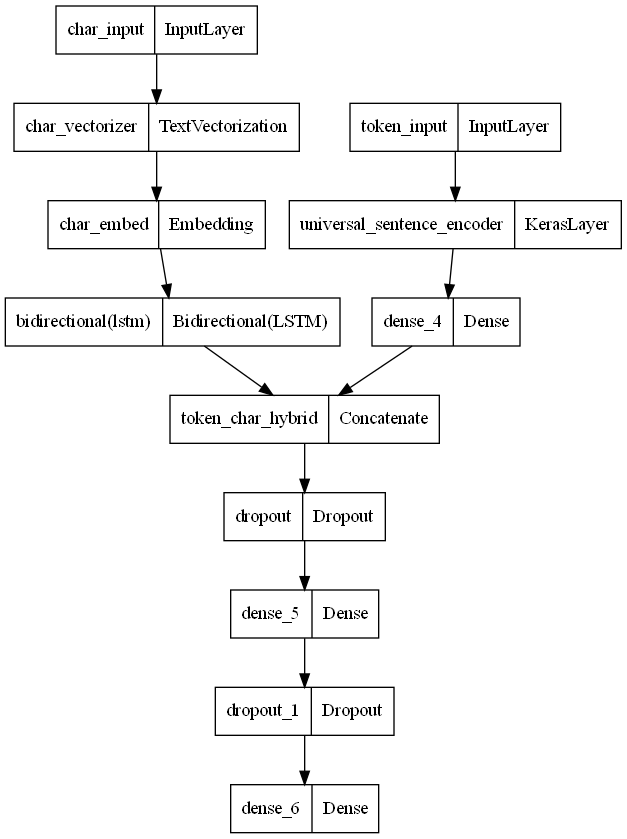

In [87]:
# Plotting the hybrid model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [88]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

In [89]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and Batch the data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [90]:
# Repeat the above steps for our validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [91]:
# Check out our training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting a model on token and character-level sequences

In [92]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 67s 106ms/step - loss: 0.9747 - accuracy: 0.6140 - val_loss: 0.7794 - val_accuracy: 0.7028
Epoch 2/3
562/562 [==============================] - 59s 105ms/step - loss: 0.7915 - accuracy: 0.6967 - val_loss: 0.7136 - val_accuracy: 0.7334
Epoch 3/3
562/562 [==============================] - 3150s 6s/step - loss: 0.7680 - accuracy: 0.7040 - val_loss: 0.6881 - val_accuracy: 0.7407


In [93]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 24s 25ms/step - loss: 0.6923 - accuracy: 0.7359


[0.692298948764801, 0.7359327673912048]

In [94]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)

945/945 [==============================] - 26s 24ms/step


In [95]:
model_4_pred_probs

array([[4.25676435e-01, 3.64466667e-01, 3.31394956e-03, 1.99385554e-01,
        7.15742400e-03],
       [3.13218087e-01, 5.15503407e-01, 2.74937390e-03, 1.66254029e-01,
        2.27510603e-03],
       [3.10099602e-01, 1.13289386e-01, 3.88605222e-02, 5.13586879e-01,
        2.41636336e-02],
       ...,
       [5.56730549e-04, 8.77550151e-03, 6.96921647e-02, 3.75246251e-04,
        9.20600235e-01],
       [6.12661336e-03, 5.96662909e-02, 2.25346670e-01, 3.57203954e-03,
        7.05288351e-01],
       [4.38960820e-01, 3.43242943e-01, 1.34833798e-01, 3.76354866e-02,
        4.53270152e-02]], dtype=float32)

In [96]:
# Getting the class hving max prob for each instance
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0], dtype=int64)>

In [97]:
# get results of token-char-hybrid-model
model_4_results = calculate_results(y_true=val_labels_encoded,
                                   y_pred=model_4_preds)
model_4_results

{'accuracy': 73.59327419568383,
 'precision': 0.7373750325762168,
 'recall': 0.7359327419568383,
 'f1': 0.7334857944272961}

In [98]:
model_1_results

{'accuracy': 78.56480868529061,
 'precision': 0.7830998450914325,
 'recall': 0.7856480868529061,
 'f1': 0.783175272404438}

**Even after comparing the a pretrained token embedding and a char embeddings our model's performance is not better than the model_1**

**We will use feature engineering to create the positional embeddings**

## Model 5 : Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

In [99]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


🚩**Any engineered feature used to tarin a model needs to be present in the test data** 

### Create positional embeddings 

In [100]:
# How many different line numbers are there?
train_df['line_number'].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

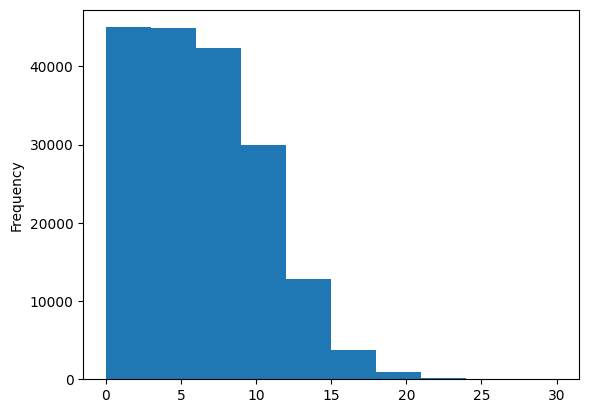

In [101]:
# We can further explore the distribution 
train_df['line_number'].plot(kind='hist')

In [102]:
# use Tensorflow to create one-hot encoded tensor of our 'line-number' column
train_line_number_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth=15)
val_line_number_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth=15)
test_line_number_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth=15)
train_line_number_one_hot,train_line_number_one_hot.shape

(<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 TensorShape([180040, 15]))

In [103]:
# How many different number of lines are there
train_df['total_lines'].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

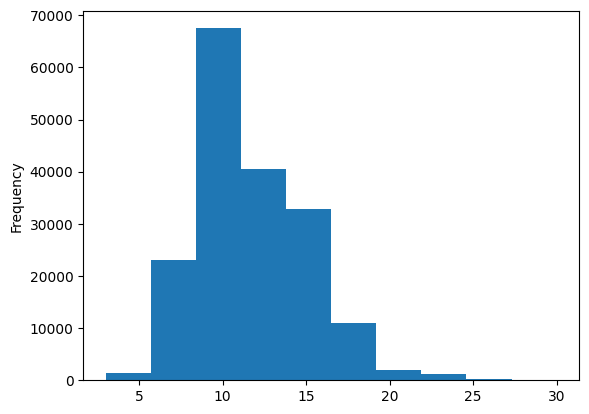

In [104]:
train_df['total_lines'].plot(kind='hist')

In [105]:
np.percentile(train_df['total_lines'], 95)

18.0

In [106]:
train_total_lines_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df['total_lines'].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(), depth=20)
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

### Building a tribrid embedding Model

1) Create a token-level model
2) create a character-level model
3) create a model for `line_number` feature
4) create a model for `total_lines` feature
5) combine o/p of 1 & 2 using tf.keras.layers.concatenate
6) combine o/p of 3, 4 & 5 using tf.keras.layers.concatenate
7) create o/p layer to accept the tribrided embedding & output label probabilities
8) combine i/p of 1,2,3,4 and o/p of 7 then pass it to a tf.keras.Model

In [107]:
# 1 Token_level model
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)


In [108]:
# 2 Char_level Model
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

In [109]:
# 3 Line number Model
# input layer that takes input 
line_number_inputs = layers.Input(shape=(15,), dtype=tf.float32, name='line_number_input')
# dense layer with 32 units and relu activation 
x = layers.Dense(32, activation='relu')(line_number_inputs)
# Combine inputs & dense layer into model 
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                  outputs=x)

In [110]:
# 4 Total lines model
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

In [111]:
# 5 Combine the token and char embedding into hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, 
                                                                              char_model.output])

In [112]:
# Combined embeddings passed though a Dense layer --> Dropoutlayer(0.5) --> tribid_embedding
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

In [113]:
# 6 Combine positional embedding with combined token and z
tribrid_embedding = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

In [114]:
# 7 create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(tribrid_embedding)


In [115]:
# 8 Put together model with all kinds of inputs
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input, 
                                 char_model.input],
                         outputs=output_layer,
                        name='model_5_tribrid_embedding_model')

In [116]:
model_5.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   

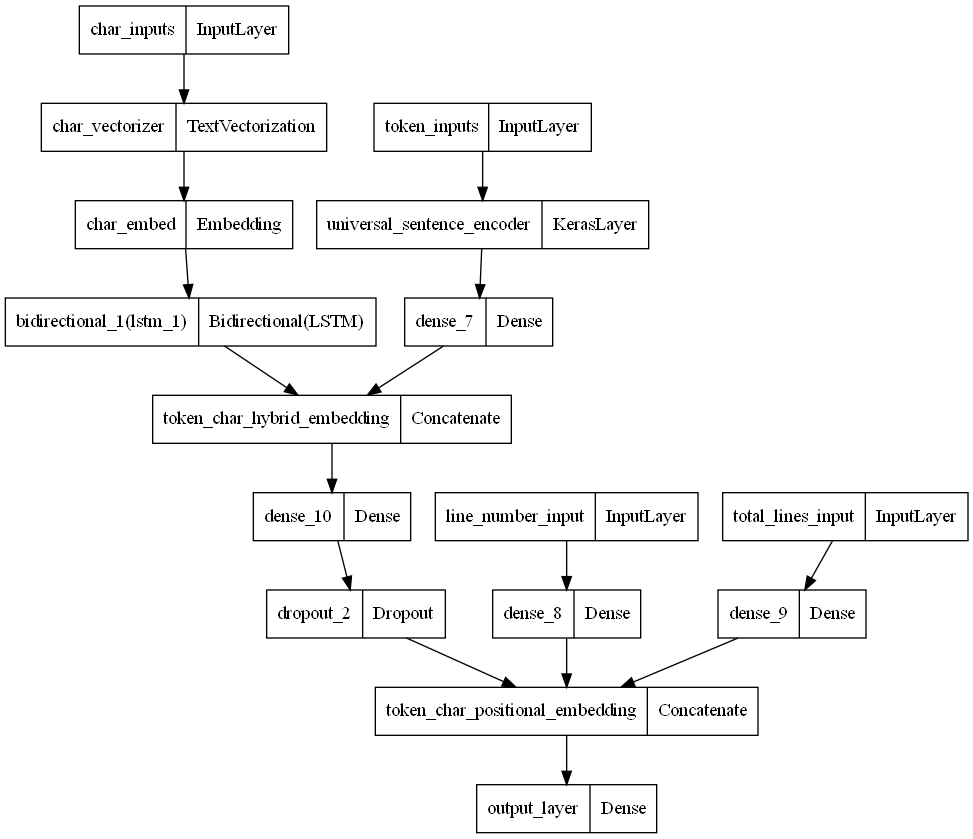

In [117]:
plot_model(model_5)

In [118]:
# Compile token, char, and positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

### Create tribrid embedding dataset using tf.data

In [119]:
# create training and validation dataset(with all four kinds of input data)
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_number_one_hot,
                                                               train_total_lines_one_hot,
                                                               train_sentences,
                                                               train_chars))
# the order of our dataset is in this way becoz we have defined our model in that particular way

train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [120]:
val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
                                                               val_total_lines_one_hot,
                                                               val_sentences,
                                                               val_chars))

val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [121]:
# shape of our input
train_char_token_dataset, val_char_token_pos_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting evaluating and making prediction with our tribrid model

In [123]:
# Fitting our tribrid embedding model
history_model_5 = model_5.fit(train_char_token_pos_dataset,
                             steps_per_epoch=int(0.1 * len(train_char_token_pos_dataset)),
                             epochs=3,
                             validation_data=val_char_token_pos_dataset,
                             validation_steps=int(0.1 * len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 170s 271ms/step - loss: 1.0948 - accuracy: 0.7276 - val_loss: 0.9842 - val_accuracy: 0.8078
Epoch 2/3
562/562 [==============================] - 145s 258ms/step - loss: 0.9674 - accuracy: 0.8148 - val_loss: 0.9501 - val_accuracy: 0.8285
Epoch 3/3
562/562 [==============================] - 147s 261ms/step - loss: 0.9517 - accuracy: 0.8206 - val_loss: 0.9378 - val_accuracy: 0.8321


In [125]:
# Make prediction with the char token pos model
model_5_pred_probs = model_5.predict(val_char_token_pos_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 65s 69ms/step


array([[0.5085275 , 0.10751128, 0.01078049, 0.3571099 , 0.01607083],
       [0.5320353 , 0.10870045, 0.05516113, 0.2918613 , 0.01224191],
       [0.2990146 , 0.11104032, 0.12773669, 0.3926287 , 0.06957963],
       ...,
       [0.04024686, 0.13544455, 0.04245665, 0.0308986 , 0.7509533 ],
       [0.02911303, 0.29852128, 0.09416387, 0.02682156, 0.5513803 ],
       [0.1943134 , 0.59925604, 0.08992507, 0.04130486, 0.07520054]],
      dtype=float32)

In [126]:
# Convert pred probs to pred labels
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1], dtype=int64)>

In [127]:
# Calculate results of the char token pos model
model_5_results = calculate_results(y_true=val_labels_encoded,
                                   y_pred=model_5_preds)
model_5_results

{'accuracy': 83.44035482589699,
 'precision': 0.8340239868969626,
 'recall': 0.8344035482589699,
 'f1': 0.8329702809795112}

## Compare Model results

In [128]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({'model_0_baseline': baseline_results,
                                 'model_1_custom_token_embedding': model_1_results,
                                 'model_2_pretrained_token_embedding': model_2_results,
                                 'model_3_custom_char_embedding': model_3_results,
                                 'model_4_hybrid_char_token_embedding': model_4_results,
                                 'model_5_pos_char_token_embedding': model_5_results})

all_model_results = all_model_results.transpose()

In [129]:
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.564809,0.783100,0.785648,0.783175
model_2_pretrained_token_embedding,71.365683,0.713978,0.713657,0.710615
model_3_custom_char_embedding,65.186019,0.641227,0.651860,0.640178
model_4_hybrid_char_token_embedding,73.593274,0.737375,0.735933,0.733486
model_5_pos_char_token_embedding,83.440355,0.834024,0.834404,0.832970


In [130]:
# Reduce the accuracy matrix to same scale as other metrics
all_model_results['accuracy'] = all_model_results['accuracy']/100

In [131]:
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,0.721832,0.718647,0.721832,0.698925
model_1_custom_token_embedding,0.785648,0.783100,0.785648,0.783175
model_2_pretrained_token_embedding,0.713657,0.713978,0.713657,0.710615
model_3_custom_char_embedding,0.651860,0.641227,0.651860,0.640178
model_4_hybrid_char_token_embedding,0.735933,0.737375,0.735933,0.733486
model_5_pos_char_token_embedding,0.834404,0.834024,0.834404,0.832970


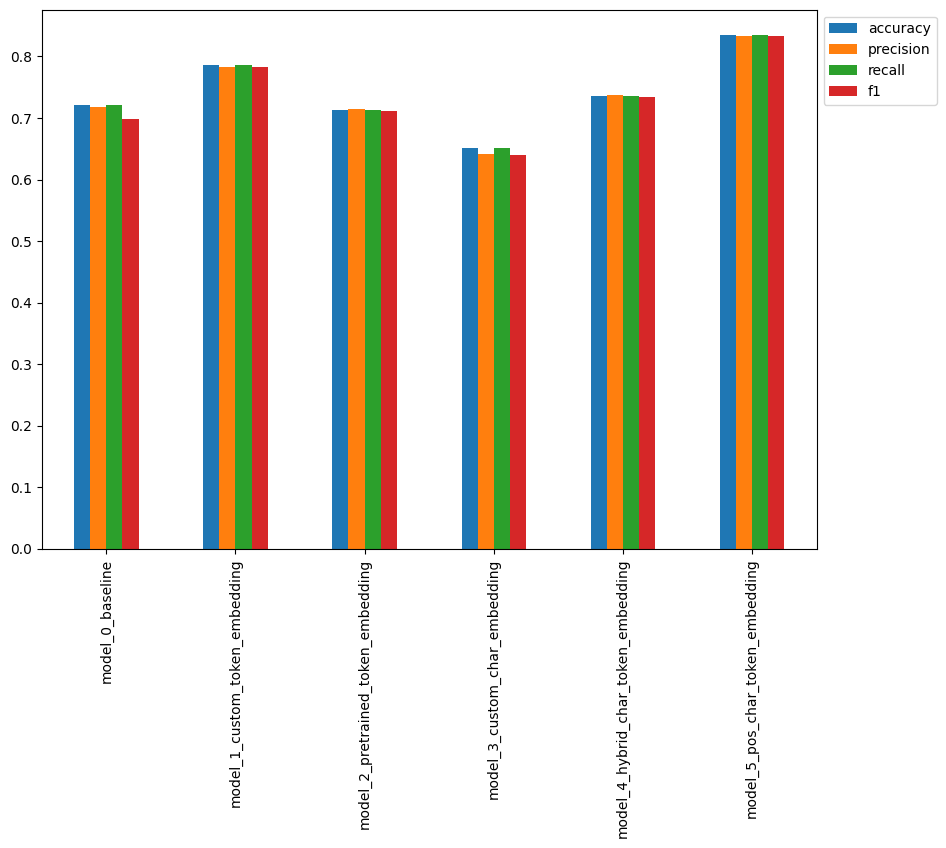

In [132]:
# Plot and compare all the model result
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

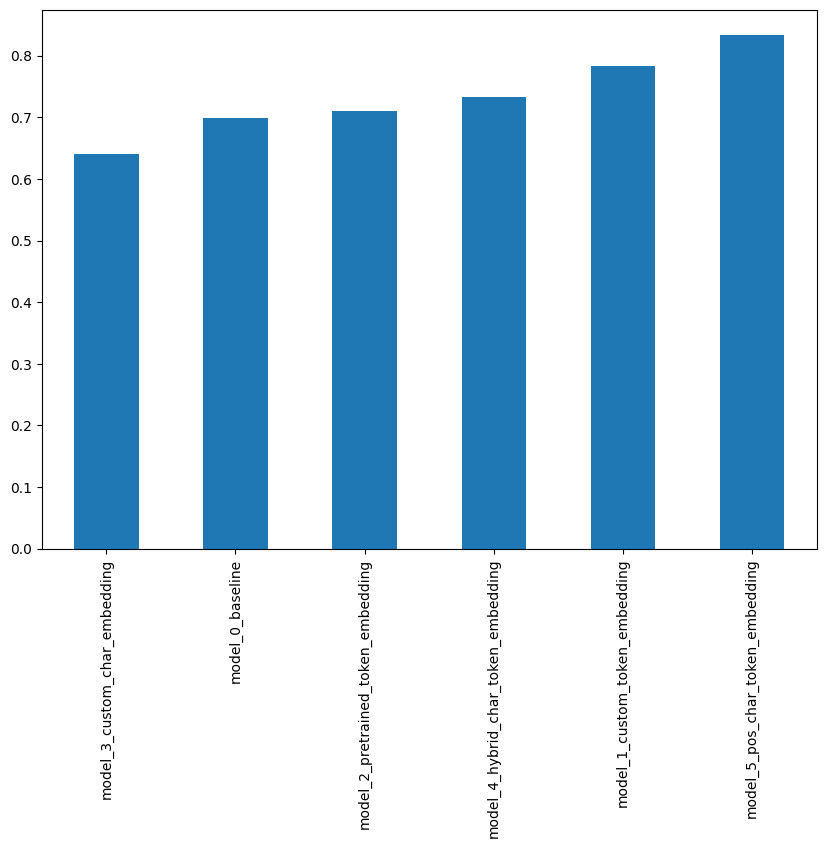

In [133]:
# Sort model results by f1-score
all_model_results.sort_values('f1', ascending=True)['f1'].plot(kind='bar', figsize=(10, 7));

### Save and load model

In [135]:
# Save the best performing model
model_5.save('skimlit_tribrid_model')

INFO:tensorflow:Assets written to: skimlit_tribrid_model\assets


INFO:tensorflow:Assets written to: skimlit_tribrid_model\assets


In [138]:
# Load in our saved model
loaded_model = tf.keras.models.load_model('skimlit_tribrid_model')

In [139]:
# Making prediction on by our loaded model on the validation dataset
loaded_pred_probs = loaded_model.predict(val_char_token_pos_dataset)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds

945/945 [==============================] - 29s 28ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1], dtype=int64)>

In [140]:
# Calculate the results of our predicted model
loaded_model_result = calculate_results(y_true=val_labels_encoded,
                                       y_pred=loaded_preds) 

In [141]:
loaded_model_result

{'accuracy': 83.44035482589699,
 'precision': 0.8340239868969626,
 'recall': 0.8344035482589699,
 'f1': 0.8329702809795112}

In [142]:
assert model_5_results == loaded_model_result